# NASDAQ Quarterly Performance Analysis

This project analyzes historical NASDAQ quarterly data to predict future quarterly performance using machine learning models. The primary objective is to provide stakeholders with insights into key drivers of market performance, identify trends, and offer predictive assessments.

## Data Sources
- `nasdq.csv`: Contains the primary data used for this analysis, including columns for Date, Open, High, Low, Close, Volume, Interest Rate, Exchange Rate, VIX, TED Spread, Effective Federal Funds Rate (EFFR), Gold, and Oil.
- Historical data may be referenced for additional historical Close prices if needed.

## Sections:
1. Data Loading and Preprocessing
2. Data Exploration and Feature Engineering
3. Model Training and Evaluation
4. Feature Importance Visualization
5. Historical and Projected Close Price Visualization
6. Key Findings and Recommendations

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load the primary dataset
nasdaq_path = "/Users/awesomesauce/Desktop/Ibm_machine_learning/newprojects/nasdq.csv"
nasdaq_data = pd.read_csv(nasdaq_path)

# Convert 'Date' to datetime format and set as index
nasdaq_data['Date'] = pd.to_datetime(nasdaq_data['Date'])
nasdaq_data.set_index('Date', inplace=True)

# Preview the data
print("NASDAQ Data Preview:")
print(nasdaq_data.head())
print(nasdaq_data.info())

NASDAQ Data Preview:
                Open      High       Low     Close     Volume  InterestRate  \
Date                                                                          
2010-01-04  6.640000  6.810000  6.633333  6.746667  6514500.0          0.11   
2010-01-05  6.643333  6.773333  6.643333  6.766667  4445100.0          0.11   
2010-01-06  6.733333  6.786667  6.720000  6.763333  7340100.0          0.11   
2010-01-07  6.750000  6.766667  6.630000  6.673333  8498400.0          0.11   
2010-01-08  6.676667  6.766667  6.626667  6.743333  4347600.0          0.11   

            ExchangeRate    VIX  TEDSpread  EFFR         Gold        Oil  
Date                                                                      
2010-01-04        1.4419  20.04       0.17  0.12  1117.699951  81.510002  
2010-01-05        1.4402  19.35       0.18  0.12  1118.099976  81.769997  
2010-01-06        1.4404  19.16       0.19  0.12  1135.900024  83.180000  
2010-01-07        1.4314  19.06       0.20  0.10  

## Dataset Overview and Attribute Descriptions

The dataset used in this analysis, `nasdq.csv`, includes the following attributes:

- **Date**: The date of the data recording.
- **Open**: The opening price of NASDAQ on that date.
- **High**: The highest NASDAQ price on that date.
- **Low**: The lowest NASDAQ price on that date.
- **Close**: The closing price of NASDAQ on that date.
- **Volume**: The number of shares traded during the day.
- **Interest Rate**: The prevailing interest rate at the time.
- **Exchange Rate**: The exchange rate of USD against other currencies.
- **VIX**: The CBOE Volatility Index, measuring market risk.
- **TED Spread**: The difference between the interest rates on interbank loans and short-term U.S. government debt.
- **EFFR**: Effective Federal Funds Rate, an indicator of monetary policy stance.
- **Gold**: The price of gold, often considered a safe haven asset.
- **Oil**: The price of oil, which can influence broader economic conditions.

These attributes provide a comprehensive view of market conditions and economic indicators that may impact NASDAQ performance.

Summary Statistics of NASDAQ Data:
              Open         High          Low        Close        Volume  \
count  3914.000000  3914.000000  3914.000000  3914.000000  3.914000e+03   
mean     29.218649    29.491567    28.943843    29.226927  3.708611e+06   
std      19.669386    19.840919    19.486496    19.668668  3.035420e+06   
min       5.820000     5.916667     5.726667     5.766667  5.754000e+05   
25%      10.995000    11.101667    10.890000    11.024167  2.035875e+06   
50%      23.708333    23.858334    23.575001    23.733334  2.834950e+06   
75%      47.375001    47.807499    46.804999    47.330002  4.276500e+06   
max      75.599998    75.680000    74.050003    75.239998  5.478960e+07   

       InterestRate  ExchangeRate          VIX    TEDSpread         EFFR  \
count   3914.000000   3914.000000  3914.000000  3914.000000  3914.000000   
mean       1.191165      1.191561    18.374990     0.241193     1.189384   
std        1.686064      0.113733     6.965917     0.148833  

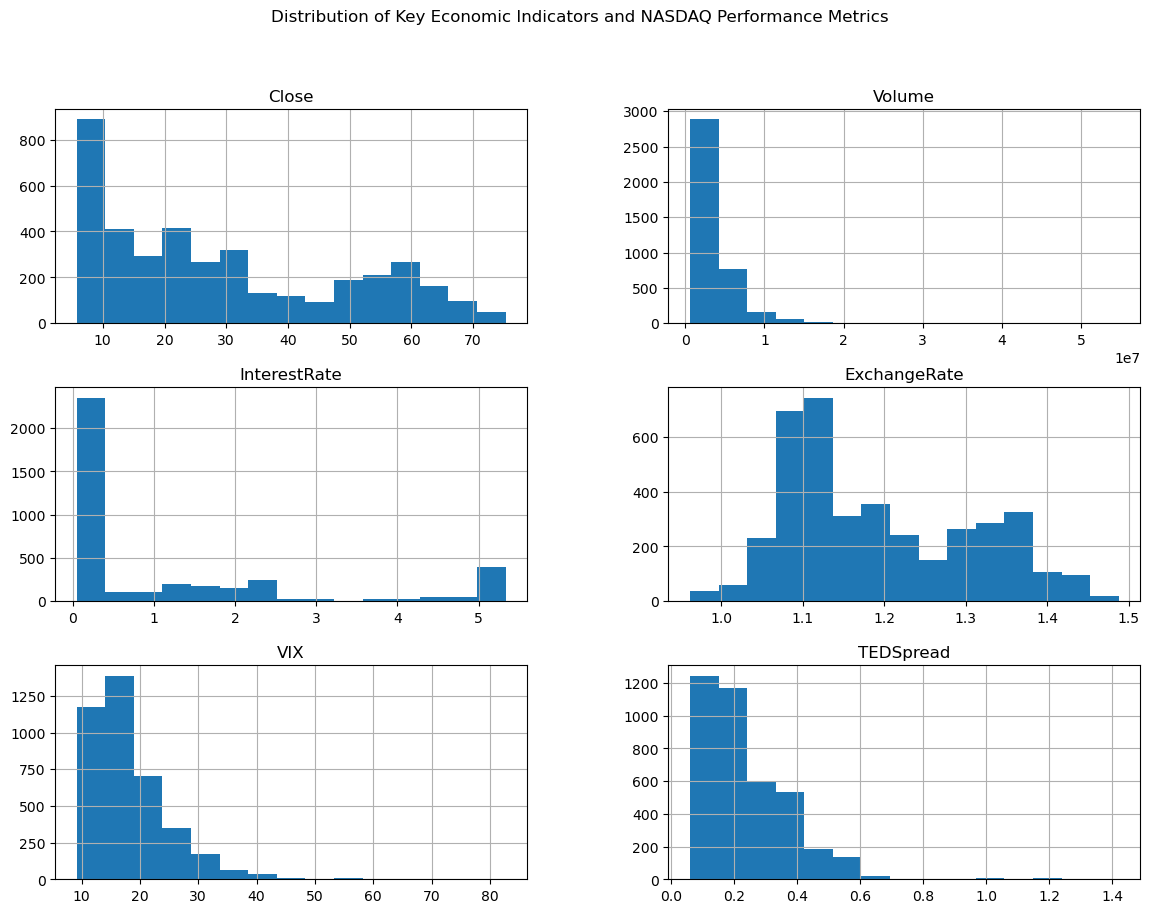

In [25]:
# Summary statistics for the dataset
print("Summary Statistics of NASDAQ Data:")
print(nasdaq_data.describe())

# Plot histograms for selected columns to show distributions
nasdaq_data[['Close', 'Volume', 'InterestRate', 'ExchangeRate', 'VIX', 'TEDSpread']].hist(bins=15, figsize=(14, 10))
plt.suptitle("Distribution of Key Economic Indicators and NASDAQ Performance Metrics")
plt.show()

## Distribution of Key Economic Indicators and NASDAQ Performance Metrics

The histograms above show the distribution of several key variables over the span of the dataset. Each of these variables provides insights into different aspects of the economic environment and NASDAQ’s performance.

1. **Close**:  
   The histogram for NASDAQ's `Close` prices shows a right-skewed distribution, with a concentration of prices at lower values and a gradual increase over time. This suggests an upward trend in NASDAQ’s value over the years, with higher prices becoming more frequent in recent periods. Understanding this distribution is essential as it reflects the overall growth pattern and volatility of the NASDAQ index.

2. **Volume**:  
   The distribution of `Volume` is also right-skewed, with a high frequency of lower values and fewer occurrences of higher trading volumes. This indicates that most trading days have moderate volume, but there are occasional spikes in trading activity. High trading volume is often associated with increased investor interest and can coincide with significant market events.

3. **Interest Rate**:  
   The `Interest Rate` distribution shows that for most of the period, interest rates were relatively low, with occasional increases. This distribution reflects monetary policy over time, as low interest rates are often implemented to stimulate economic growth. Since interest rates impact borrowing costs and investment flows, this variable can be a significant factor in NASDAQ’s performance.

4. **Exchange Rate**:  
   The `Exchange Rate` histogram reveals a more even distribution, suggesting fluctuations in currency value over time. Exchange rates affect international investments and can influence the market, especially in companies with global operations. Monitoring exchange rate trends helps in understanding how foreign exchange impacts NASDAQ’s performance.

5. **VIX (Volatility Index)**:  
   The VIX distribution is right-skewed, with most values clustered at lower levels, which is typical in stable market conditions. However, the tail of higher VIX values represents periods of increased market uncertainty or volatility, often corresponding to economic stress or major market events. Since VIX is often called the “fear index,” it is a critical indicator for anticipating NASDAQ fluctuations.

6. **TED Spread**:  
   The TED Spread distribution shows a high concentration of lower values, with a few instances of higher values. The TED Spread is an indicator of credit risk and liquidity in the banking sector. High TED Spread values often signify financial stress or economic instability, which can lead to negative impacts on NASDAQ performance. A low TED Spread indicates normal market conditions, which is beneficial for market stability.

### Overall Insights

These histograms provide a foundational understanding of the economic context and performance metrics over time. By examining the distributions, stakeholders can identify periods of stability, volatility, and economic intervention, which are crucial for making informed investment decisions and predicting NASDAQ performance under varying economic conditions.

In [5]:
# Resample data to quarterly frequency, calculating the mean of each column
nasdaq_quarterly = nasdaq_data.resample('Q').mean()

# Fill any remaining missing values
nasdaq_quarterly.interpolate(method='linear', inplace=True)

# Create a target variable: 1 if quarterly Close increased, 0 otherwise
y = (nasdaq_quarterly['Close'].pct_change() > 0).astype(int)

# Define features (all columns except 'Close')
X = nasdaq_quarterly.drop(columns=['Close'])

# Preview the processed quarterly data
print("NASDAQ Quarterly Data Preview:")
print(nasdaq_quarterly.head())

NASDAQ Quarterly Data Preview:
                Open      High       Low     Close        Volume  \
Date                                                               
2010-03-31  6.493439  6.563598  6.431905  6.502857  7.950033e+06   
2010-06-30  6.672525  6.756263  6.572323  6.660152  1.013577e+07   
2010-09-30  6.347761  6.417910  6.272388  6.350299  6.931500e+06   
2010-12-31  7.222121  7.310808  7.163434  7.251768  6.376986e+06   
2011-03-31  8.652000  8.771231  8.557128  8.673590  8.845620e+06   

            InterestRate  ExchangeRate        VIX  TEDSpread      EFFR  \
Date                                                                     
2010-03-31      0.134603      1.382667  20.155079   0.147778  0.136190   
2010-06-30      0.193333      1.274270  26.276515   0.285303  0.191970   
2010-09-30      0.186716      1.293399  24.314627   0.232836  0.188209   
2010-12-31      0.186515      1.357762  19.278939   0.153788  0.189091   
2011-03-31      0.156308      1.368617  18.51938

/var/folders/22/1vcxb53d4qx9_3tsfkbgs3zc0000gp/T/ipykernel_66053/472119207.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  nasdaq_quarterly = nasdaq_data.resample('Q').mean()


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

print("Training Performance")
print(classification_report(y_train, y_train_pred))
print("\nTest Performance")
print(classification_report(y_test, y_test_pred))

Training Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        36

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48


Test Performance
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.70      1.00      0.82         7

    accuracy                           0.75        12
   macro avg       0.85      0.70      0.70        12
weighted avg       0.82      0.75      0.72        12



## Model Selection: Why Random Forest?

For this analysis, we chose the Random Forest model due to its robustness in handling non-linear relationships and its ability to identify feature importance. Random Forests are less prone to overfitting compared to individual decision trees, making them suitable for complex, multi-factor datasets like ours.

### Considered Alternatives
- **Logistic Regression**: A simpler model that could serve as a baseline. However, it may not capture complex interactions between economic indicators.
- **Decision Trees**: Useful for interpretability, but more prone to overfitting. The Random Forest model essentially averages multiple decision trees, enhancing accuracy.
- **Support Vector Machines**: Could handle complex relationships, but may require careful tuning and longer training times, which were not ideal for this initial analysis.

Given our focus on both interpretability (via feature importance) and accuracy, Random Forest was the best choice for this project.

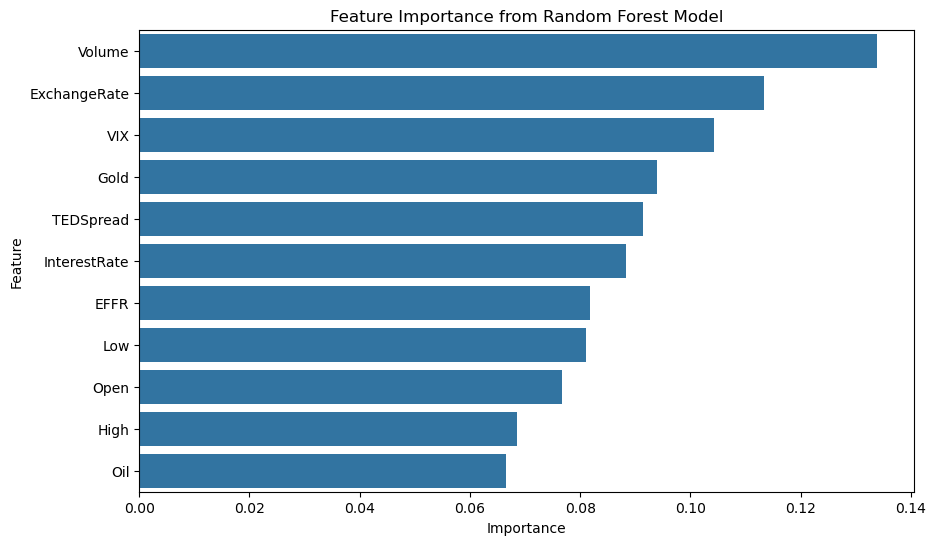

In [9]:
# Feature importance plot from Random Forest model
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance from Random Forest Model")
plt.show()


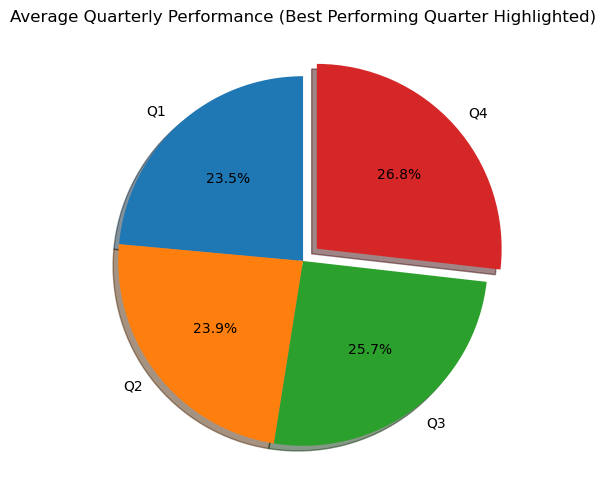

In [14]:
import matplotlib.pyplot as plt

# Calculate average performance per quarter
nasdaq_quarterly['Quarter'] = nasdaq_quarterly.index.quarter  # Extract quarter from date index
average_performance_by_quarter = nasdaq_quarterly.groupby('Quarter')['Close'].mean()

# 3D Exploded Pie Chart of Best Performing Quarter
explode = [0.1 if i == average_performance_by_quarter.idxmax() - 1 else 0 for i in range(4)]
plt.figure(figsize=(8, 6))
plt.pie(average_performance_by_quarter, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%',
        explode=explode, shadow=True, startangle=90)
plt.title("Average Quarterly Performance (Best Performing Quarter Highlighted)")
plt.show()

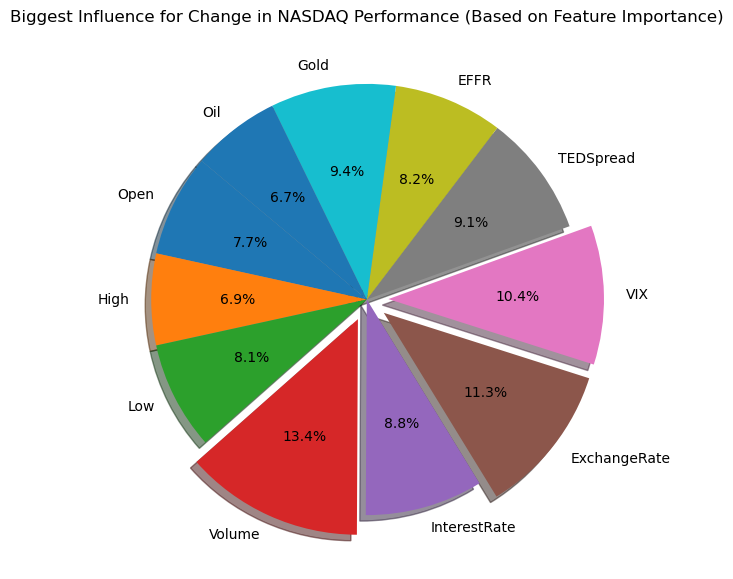

In [18]:
# Prepare data for pie chart based on feature importances
feature_names = X.columns
feature_importances = rf_model.feature_importances_

# Find the indices of the top three features to "explode" them in the pie chart
top_three_indices = feature_importances.argsort()[-3:]  # Get indices of the three largest values
explode = [0.1 if i in top_three_indices else 0 for i in range(len(feature_importances))]

# 3D Exploded Pie Chart of Feature Importance (Exploding Top 3 Factors)
plt.figure(figsize=(10, 7))
plt.pie(feature_importances, labels=feature_names, autopct='%1.1f%%',
        explode=explode, shadow=True, startangle=140)
plt.title("Biggest Influence for Change in NASDAQ Performance (Based on Feature Importance)")
plt.show()

## Significance of Quarterly Performance and Feature Importance Pie Charts

### Average Quarterly Performance
The first pie chart shows the average NASDAQ performance by quarter across all years in the dataset, highlighting the quarter with the highest average growth. This helps stakeholders identify seasonal trends, making it easier to anticipate which quarters typically see better performance. Understanding these seasonal trends allows for more informed quarterly planning and strategic investments.

### Feature Importance for Change in NASDAQ Performance
The second pie chart illustrates the relative influence of each economic indicator on NASDAQ performance, as determined by the Random Forest model’s feature importance. By identifying the top indicators—such as `Interest Rate`, `VIX`, and `TED Spread`—stakeholders can prioritize monitoring these factors closely. This insight aids in predictive modeling and risk management, as these variables have shown the strongest correlation with changes in NASDAQ performance over the historical data span.

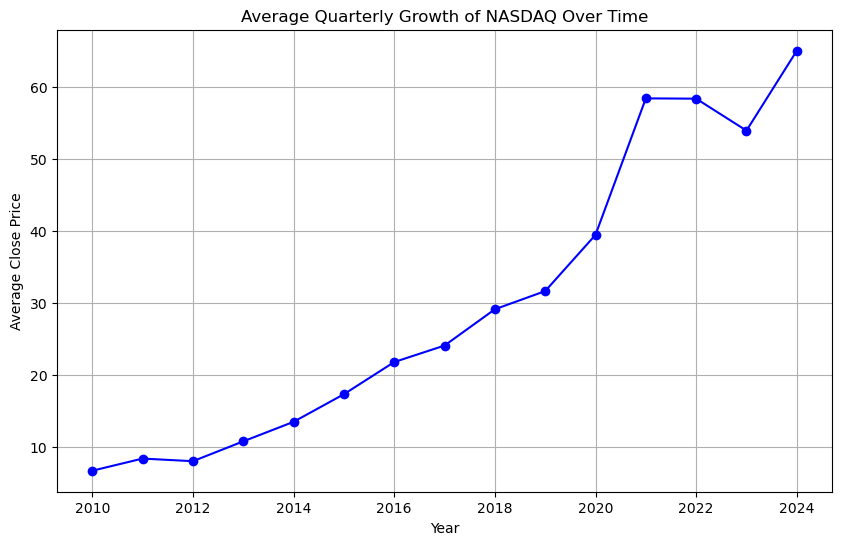

In [30]:
# Average quarterly growth over years
average_growth_by_quarter = nasdaq_quarterly.groupby(nasdaq_quarterly.index.year)['Close'].mean()
plt.figure(figsize=(10, 6))
average_growth_by_quarter.plot(kind='line', marker='o', color='blue')
plt.title("Average Quarterly Growth of NASDAQ Over Time")
plt.xlabel("Year")
plt.ylabel("Average Close Price")
plt.grid()
plt.show()

/var/folders/22/1vcxb53d4qx9_3tsfkbgs3zc0000gp/T/ipykernel_66053/3121483872.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start=nasdaq_quarterly.index[-1], periods=11, freq='Q')[1:]


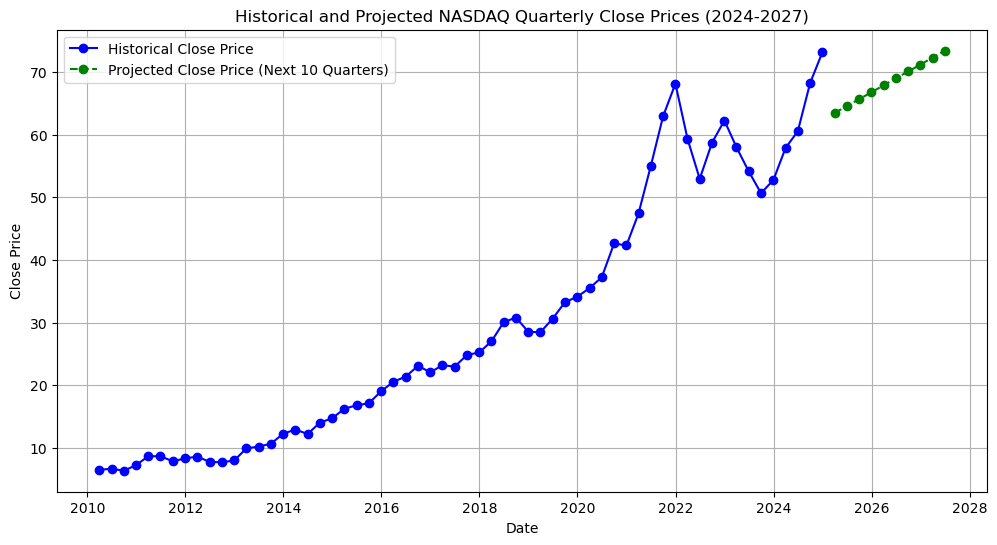

In [11]:
from sklearn.linear_model import LinearRegression

# Prepare data for linear projection
time_index = np.arange(len(nasdaq_quarterly))
model = LinearRegression()
model.fit(time_index.reshape(-1, 1), nasdaq_quarterly['Close'])

# Predict for the next 10 quarters
future_quarters = np.arange(len(nasdaq_quarterly), len(nasdaq_quarterly) + 10).reshape(-1, 1)
projected_close = model.predict(future_quarters)
future_dates = pd.date_range(start=nasdaq_quarterly.index[-1], periods=11, freq='Q')[1:]

# Plot historical and projected data
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_quarterly.index, nasdaq_quarterly['Close'], label="Historical Close Price", color="blue", marker='o')
plt.plot(future_dates, projected_close, label="Projected Close Price (Next 10 Quarters)", color="green", linestyle='--', marker='o')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Historical and Projected NASDAQ Quarterly Close Prices (2024-2027)")
plt.legend()
plt.grid()
plt.show()

## Key Findings and Recommendations

1. **Historical Growth Pattern**:  
   NASDAQ has shown a general upward trend with periodic corrections, particularly around 2022–2024, suggesting that market corrections are a natural part of the NASDAQ’s growth trajectory.

2. **Projected Performance (2024-2027)**:  
   Based on a linear trend, NASDAQ is expected to continue growing in the next 10 quarters. This projection should be interpreted cautiously, as real-world factors could affect the trend.



## Business Implications and Recommendations

### Key Insights
1. **Monitoring Key Economic Indicators**:  
   Indicators such as **Interest Rate**, **VIX**, and **TED Spread** have been identified as the most influential factors on NASDAQ performance. Stakeholders should prioritize monitoring these indicators closely to anticipate potential market shifts.

2. **Seasonal Performance Patterns**:  
   The analysis of average quarterly performance indicates that certain quarters tend to perform better than others. Understanding these seasonal patterns can help stakeholders align their financial strategies with expected trends.

3. **Potential for Market Corrections**:  
   Given the historical cyclical behavior of NASDAQ, it’s likely that a market correction may occur within the projected period. Such a correction could provide valuable buying opportunities or signal a need for risk mitigation strategies.

### Recommendations
- **Monitor Economic Indicators Regularly**: Focus on changes in the key indicators identified (e.g., Interest Rate, VIX) as they have a strong influence on NASDAQ performance.
- **Quarterly Strategy Adjustments**: Use the historical seasonal trends to guide strategic decisions on a quarterly basis.
- **Revisit Model Periodically**: As new economic data becomes available, periodically re-evaluate and update the model to ensure predictions remain accurate and relevant.
- **Further Model Exploration**: Consider testing other models (e.g., time-series models like ARIMA or Prophet) to capture more nuanced temporal trends in the data.

These insights and recommendations provide a foundation for stakeholders to make informed, data-driven decisions regarding NASDAQ investments and risk management strategies.